In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('FTTH-DataSet.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94478 entries, 0 to 94477
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              94478 non-null  int64  
 1   GOVERNORATE                     94155 non-null  object 
 2   Customer with orange_MONTHS     94478 non-null  float64
 3   CUSTOMER_AGE_MONTHS             94478 non-null  float64
 4   CUSTOMER_GENDER                 94424 non-null  object 
 5   COMMITMENT                      94478 non-null  int64  
 6   COMMITMENT_FG                   94478 non-null  int64  
 7   OF_SPEED                        94478 non-null  int64  
 8   OF_PREV_SPEED                   19764 non-null  float64
 9   MIGRATION_FLAG                  94478 non-null  object 
 10  LAST_LINK_QUALITY               94450 non-null  object 
 11  LAST_LINK_STATUS                94450 non-null  object 
 12  LAST_POWER_VALIDATION           

with info function we can check the data type in each column, and check if we have null values or not

In [4]:
data2 = data.copy()

here we will drop 4 columns as ordered from Orange company 

In [5]:
data2.drop(['LAST_LINK_QUALITY','LAST_LINK_STATUS','LAST_POWER_VALIDATION','LAST_LINK_PRIORITY'],axis=1,inplace=True)

In [6]:
data2_desc = data2.describe()
data2_desc.T

,count,mean,std,min,25%,50%,75%,max
ID,94478.0,47239.500000,27273.593703,1.0,23620.250000,47239.500000,70858.750000,94478.000000
Customer with orange_MONTHS,94478.0,17.267393,10.716024,1.0,8.516129,15.612903,25.354839,50.838710
CUSTOMER_AGE_MONTHS,94478.0,555.466332,192.770294,1.0,409.129032,544.322581,678.935484,11561.806452
COMMITMENT,94478.0,21.893605,5.624438,12.0,24.000000,24.000000,24.000000,36.000000
COMMITMENT_FG,94478.0,0.816296,0.387245,0.0,1.000000,1.000000,1.000000,1.000000
OF_SPEED,94478.0,100.553991,98.030642,30.0,60.000000,60.000000,100.000000,1000.000000
OF_PREV_SPEED,19764.0,101.627707,77.909531,30.0,60.000000,60.000000,100.000000,1000.000000
Disconnection_TOTAL_MAX_day,93853.0,2.319095,8.209725,1.0,1.000000,1.000000,2.000000,630.000000
Disconnection_TOTAL_MIN_day,93853.0,1.000661,0.031976,1.0,1.000000,1.000000,1.000000,5.000000
Disconnection_TOTAL_SUM_Month,93853.0,14.220281,34.289139,1.0,6.000000,8.000000,14.000000,4564.000000


In [7]:
# check columns to make the roles clear
data2.columns

Index(['ID', 'GOVERNORATE', 'Customer with orange_MONTHS',
       'CUSTOMER_AGE_MONTHS', 'CUSTOMER_GENDER', 'COMMITMENT', 'COMMITMENT_FG',
       'OF_SPEED', 'OF_PREV_SPEED', 'MIGRATION_FLAG',
       'Disconnection_TOTAL_MAX_day', 'Disconnection_TOTAL_MIN_day',
       'Disconnection_TOTAL_SUM_Month', 'Disconnection_TOTAL_MEAN_Month',
       'GB_TOTAL_CONSUMPTION_Month1', 'GB_TOTAL_CONSUMPTION_Month2',
       'GB_TOTAL_CONSUMPTION_Month3', 'TARGET'],
      dtype='object')

In [8]:
data2.isnull().sum()

ID                                    0
GOVERNORATE                         323
Customer with orange_MONTHS           0
CUSTOMER_AGE_MONTHS                   0
CUSTOMER_GENDER                      54
COMMITMENT                            0
COMMITMENT_FG                         0
OF_SPEED                              0
OF_PREV_SPEED                     74714
MIGRATION_FLAG                        0
Disconnection_TOTAL_MAX_day         625
Disconnection_TOTAL_MIN_day         625
Disconnection_TOTAL_SUM_Month       625
Disconnection_TOTAL_MEAN_Month      625
GB_TOTAL_CONSUMPTION_Month1         155
GB_TOTAL_CONSUMPTION_Month2         367
GB_TOTAL_CONSUMPTION_Month3        4242
TARGET                                0
dtype: int64

## columns roles :- 

#### GOVERNORATE :- 
The location of subsecriber in jordan (Categegorical nominal variables) 

#### CUSTOMER_WITH_ORANGE_MONTHS:- 
The duration of the customer's presence with the services of Orange Company (Months) .. 

#### CUSTOMER_AGE_MONTHS :- 
The Age of the customer in (months)

#### CUSTOMER_GENDER :-
The gender of the customer (Male or Female) 

#### COMMITMENT :- 
The duration of the subscription - contract - for the fiber service (12 month, 24 
month, 36 month).

#### COMMITMENT_FG:-

FG: The possibility of customer commitment to the subscription period (Yes (1) or No (0)).

on this column we have a good question :- this prob calculates based on what???? 
#### OF_SPEED:- 
Fiber speed (30, 60, 100, 120, 200, 300, 400, 600, 1000) in MB. --> Discrete values 

#### OF_PREV_SPEED :- 
previous Fiber speed (30, 60, 100, 120, 200, 300, 400, 600, 1000) in MB. --> Discrete values

on this column we have a question, if the subscriber dosn't have pre subscribtion what is the value we will fill in the recored ???? 

#### MIGRATION_FLAG
An indication that the customer changed the speed of the fiber subscription (Yes (y) or No (n)).

#### Disconnection_TOTAL_MAX_day 

indicat to the maximum number of disconnection in each day. 

#### Disconnection_TOTAL_MIN_day 
indicate to the minimum number of disconnection in each day. 

#### Disconnection_TOTAL_SUM_Month :
indecate to the summation of disconnections in all month. 

#### Disconnection_TOTAL_MEAN_Month :-
indecate to the mean of disconnections in the month

#### GB_TOTAL_CONSUMPTION_Month1 :- 
total CONSUMPTION in first month

#### GB_TOTAL_CONSUMPTION_Month2 :- 
total Consumption in the second month 

#### GB_TOTAL_CONSUMPTION_Month3 :- 
total consumption in the third month 

#### TARGET :- 
Whether the customer churned or not (Yes (1) or No(0)).

Governorage --> categorical variable 

Customer with oranges month --> continuous variable (monthes)

Customer_age_monthes --> continuous varbiable 

Customer_gender --> discrete (0-1)

COMMITMENT --> discrete values(12,24,36)

COMMITMENT_FG --> discrete(0,1)

OF_SPEED --> internet speed in MG 

OF_PREV_SPEED --> previous internet speed in MG

internet speed in MG -->discrete(0,1)

GB_TOTAL_CONSUMPTION_Month1 --> continous variable in GB

Traget --> (0 , 1)

# Univariate Analysiss

### in this section we'll pass throw all columns and try to find strange things about it 

we will check the following :- 
* Data Exploration 

* Distribution of the data 

* Outliers detection 

* Data Quality Assessment  

#### Customer with orange Months column

In [9]:
# we can see that the column name dosn't match the practice that used in this dataset so we'll change it
data2.rename(columns={'Customer with orange_MONTHS': 'CUSTOMER_WITH_ORANGE_MONTHS'}, inplace=True)

In [10]:
data2.CUSTOMER_WITH_ORANGE_MONTHS.describe()

count    94478.000000
mean        17.267393
std         10.716024
min          1.000000
25%          8.516129
50%         15.612903
75%         25.354839
max         50.838710
Name: CUSTOMER_WITH_ORANGE_MONTHS, dtype: float64

the min value  = 1 (month) 
the max value 50 (months) 

the majority of data below 25 so this data is skwed to the right 

Text(0.5, 1.0, 'Distribution of CUSTOMER_WITH_ORANGE_MONTHS')

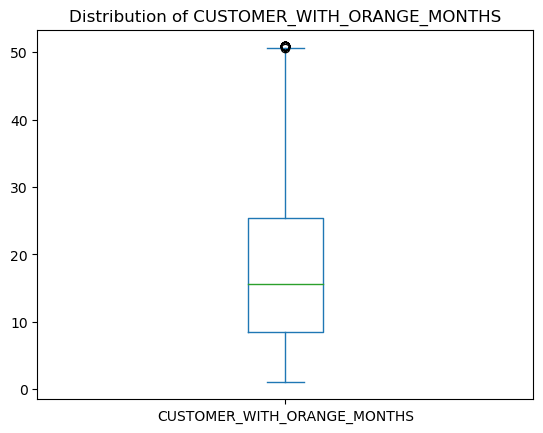

In [11]:
# draw a boxplot to check the distrbution and detect outliers 

data2.CUSTOMER_WITH_ORANGE_MONTHS.plot.box()
plt.title('Distribution of CUSTOMER_WITH_ORANGE_MONTHS')

we can see the distribution of this column is good , but is the colummn follow the normal dist? 

(array([5910., 6220., 3254., 5074., 5860., 5756., 5686., 4907., 5152.,
        3623., 4394., 4631., 4544., 3904., 3196., 3538., 3409., 3662.,
        2954., 2374., 2539.,  449.,  677.,  878.,  415.,  558.,  383.,
         301.,  124.,  106.]),
 array([ 1.        ,  2.66129032,  4.32258065,  5.98387097,  7.64516129,
         9.30645161, 10.96774194, 12.62903226, 14.29032258, 15.9516129 ,
        17.61290323, 19.27419355, 20.93548387, 22.59677419, 24.25806452,
        25.91935484, 27.58064516, 29.24193548, 30.90322581, 32.56451613,
        34.22580645, 35.88709677, 37.5483871 , 39.20967742, 40.87096774,
        42.53225806, 44.19354839, 45.85483871, 47.51612903, 49.17741935,
        50.83870968]),
 <BarContainer object of 30 artists>)

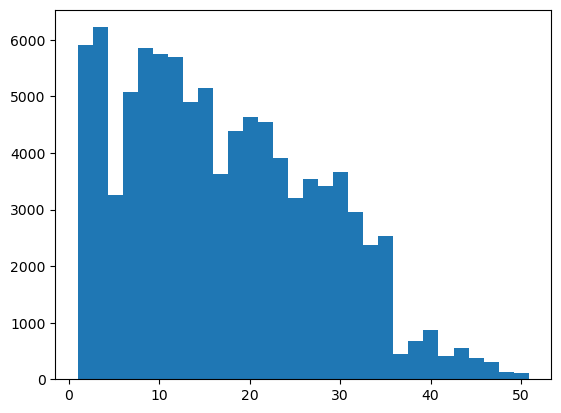

In [12]:
plt.hist(data2.CUSTOMER_WITH_ORANGE_MONTHS,bins=30)

our column dosn't follow the normal distribuiton 

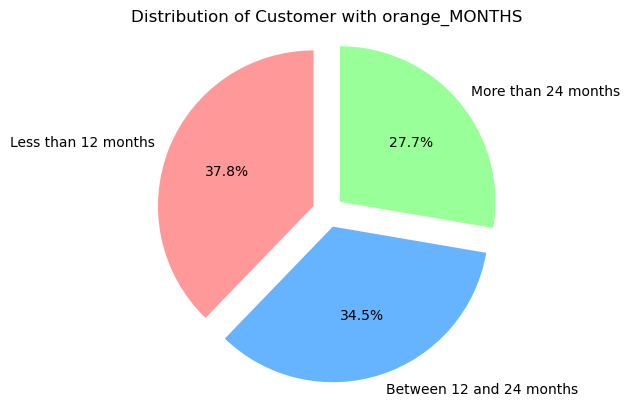

In [13]:
condition1 = data2['CUSTOMER_WITH_ORANGE_MONTHS'] < 12
condition2 = (data2['CUSTOMER_WITH_ORANGE_MONTHS'] >= 12) & (data2['CUSTOMER_WITH_ORANGE_MONTHS'] <= 24)
condition3 = data2['CUSTOMER_WITH_ORANGE_MONTHS'] > 24

count1 = data2[condition1].shape[0]
count2 = data2[condition2].shape[0]
count3 = data2[condition3].shape[0]

labels = ['Less than 12 months', 'Between 12 and 24 months', 'More than 24 months']
sizes = [count1, count2, count3]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.1, 0.1)  # Explode slices for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Customer with orange_MONTHS')
plt.show()

## CUSTOMER_AGE_MONTHS

first we want to change the unit from months to years to make sense for humans 

In [14]:
data2.CUSTOMER_AGE_MONTHS = round(data2.CUSTOMER_AGE_MONTHS/12)

data2.rename(columns={'CUSTOMER_AGE_MONTHS': 'CUSTOMER_AGE'}, inplace=True)

In [15]:
data2.CUSTOMER_AGE.describe()

count    94478.000000
mean        46.303764
std         16.098921
min          0.000000
25%         34.000000
50%         45.000000
75%         57.000000
max        963.000000
Name: CUSTOMER_AGE, dtype: float64

we can see we have some bad numberes in this columns :- 

* 0 year dosn't make sense to have a fiber contract with Orange 
* max age = 936 year !!!! is he connect from his grave !!!

<Axes: >

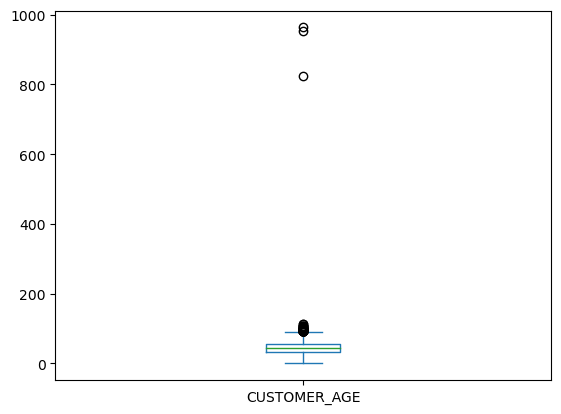

In [16]:
data2.CUSTOMER_AGE.plot.box()

we can see that the distribution of the age dosn't make sense(unreal age) There is no pepole with 700 year age !!!!

we will drop the columns with under age and with unreal age

we have 22 column from more than 90000 so we don't think that this drop will affect the resluts

In [17]:
data2 = data2.drop(data2[data2['CUSTOMER_AGE'] > 120].index)

In [18]:
data2 = data2.drop(data2[data2["CUSTOMER_AGE"]<18].index)

we will check if we fix the distribution of the column or not 

<Axes: >

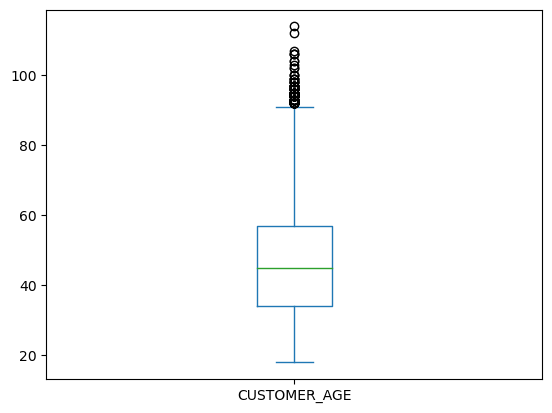

In [19]:
data2.CUSTOMER_AGE.plot.box()

Lets draw a histogram for this coulmn after applying the cleaning 

(array([1.756e+03, 3.950e+03, 5.266e+03, 5.688e+03, 5.733e+03, 7.797e+03,
        6.256e+03, 6.606e+03, 6.547e+03, 6.763e+03, 8.516e+03, 5.736e+03,
        4.986e+03, 4.079e+03, 3.487e+03, 3.332e+03, 1.967e+03, 1.934e+03,
        1.553e+03, 1.034e+03, 8.170e+02, 3.080e+02, 1.360e+02, 6.900e+01,
        3.000e+01, 1.200e+01, 5.000e+00, 4.000e+00, 0.000e+00, 2.000e+00]),
 array([ 18. ,  21.2,  24.4,  27.6,  30.8,  34. ,  37.2,  40.4,  43.6,
         46.8,  50. ,  53.2,  56.4,  59.6,  62.8,  66. ,  69.2,  72.4,
         75.6,  78.8,  82. ,  85.2,  88.4,  91.6,  94.8,  98. , 101.2,
        104.4, 107.6, 110.8, 114. ]),
 <BarContainer object of 30 artists>)

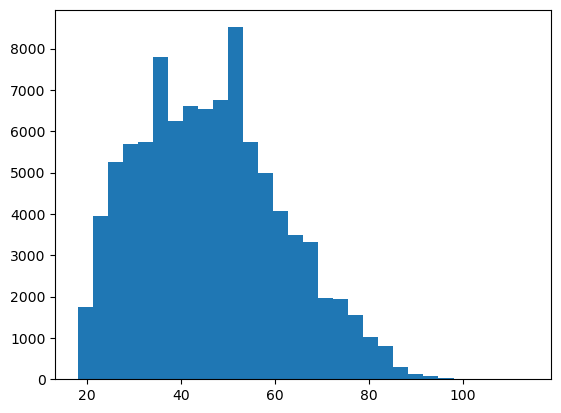

In [20]:
plt.hist(data2.CUSTOMER_AGE,bins=30)

#### COMMITMENT column

In [21]:
data2.COMMITMENT.value_counts()

24    70738
12    20102
36     3529
Name: COMMITMENT, dtype: int64

In [22]:
# check if there is any null value 
data2.COMMITMENT.isnull().sum()

0

<Axes: xlabel='COMMITMENT', ylabel='count'>

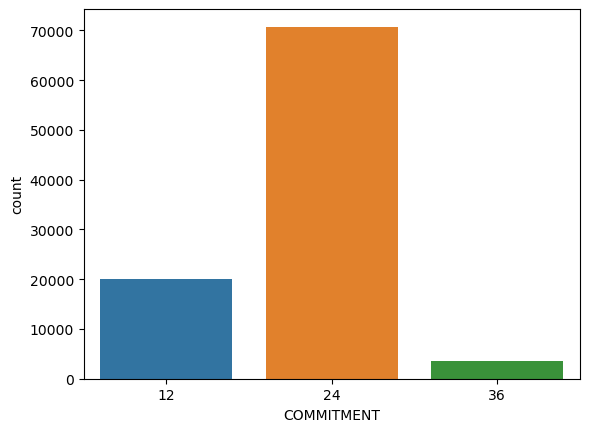

In [23]:
sns.countplot(x='COMMITMENT',data=data2)

This graph tells us that the most subsecribers have 24 months contract and people who have 36 months contract is the least 

#### OF_SPEED column

In [24]:
data2.OF_SPEED.value_counts().sort_index()

30      18586
60      37221
100     15609
120      5121
200     14103
300       515
400      2720
600       103
1000      391
Name: OF_SPEED, dtype: int64

In [25]:
# check if there is any null value 
data2.OF_SPEED.isnull().sum()

0

<Axes: xlabel='OF_SPEED', ylabel='count'>

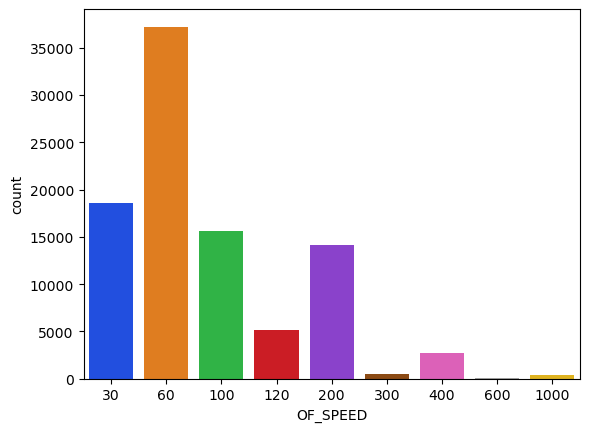

In [26]:
sns.countplot(x='OF_SPEED',data=data2,palette='bright')

#### OF_PREV_SPEED

In [27]:
data2.OF_PREV_SPEED.value_counts()

60.0      8669
100.0     5232
200.0     4048
30.0      1565
300.0       77
120.0       70
1000.0      63
400.0       20
600.0        8
Name: OF_PREV_SPEED, dtype: int64

In [28]:
# check if there is any null value 
data2.OF_PREV_SPEED.isnull().sum()

74617

In [29]:
data2.shape[0] - data2.OF_PREV_SPEED.isnull().sum()

19752

There is many null values in this column,we can say that the people with null value in this column mean that they are new subs at Orange !!!!


<Axes: xlabel='OF_PREV_SPEED', ylabel='count'>

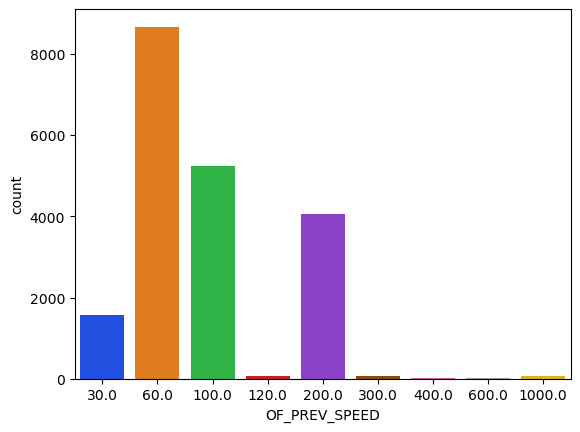

In [30]:
sns.countplot(x=data2.OF_PREV_SPEED.sort_index(),data=data2,palette='bright')

In [31]:
###Hypothysis testing

In [32]:
import numpy as np
import pandas as pd
from scipy import stats


CUSTOMER_GENDER = data2["CUSTOMER_GENDER"]
TARGET = data2["TARGET"]

contingency_table = pd.crosstab(CUSTOMER_GENDER, TARGET)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared test statistic is %f" % chi2)
print("p-value for two tailed test is %f" % p_value)
print("degrees of freedom is %d" % dof)

if p_value <= 0.05:
    print("Conclusion\nSince p-value(=%f)" % p_value, "<", "alpha(=%.2f)" % 0.05,
          '''We reject the null hypothesis H0. So we conclude that the distribution of CUSTOMER_AGE is different from TARGET at %.2f level of significance.''' % 0.05)
else:
    print("Conclusion\nSince p-value(=%f)" % p_value, ">", "alpha(=%.2f)" % 0.05,
          '''We do not reject the null hypothesis H0.''')

Chi-squared test statistic is 0.087607
p-value for two tailed test is 0.957142
degrees of freedom is 2
Conclusion
Since p-value(=0.957142) > alpha(=0.05) We do not reject the null hypothesis H0.


In [33]:
import numpy as np
import pandas as pd
from scipy import stats


CUSTOMER_AGE = data2["CUSTOMER_AGE"]
TARGET = data2["TARGET"]

contingency_table = pd.crosstab(CUSTOMER_AGE, TARGET)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared test statistic is %f" % chi2)
print("p-value for two tailed test is %f" % p_value)
print("degrees of freedom is %d" % dof)

if p_value <= 0.05:
    print("Conclusion\nSince p-value(=%f)" % p_value, "<", "alpha(=%.2f)" % 0.05,
          '''We reject the null hypothesis H0. So we conclude that the distribution of CUSTOMER_AGE is different from TARGET at %.2f level of significance.''' % 0.05)
else:
    print("Conclusion\nSince p-value(=%f)" % p_value, ">", "alpha(=%.2f)" % 0.05,
          '''We do not reject the null hypothesis H0.''')

Chi-squared test statistic is 81.992883
p-value for two tailed test is 0.687695
degrees of freedom is 89
Conclusion
Since p-value(=0.687695) > alpha(=0.05) We do not reject the null hypothesis H0.


#### MIGRATION_FLAG

In [34]:
data2.MIGRATION_FLAG.value_counts()

n    74614
y    19755
Name: MIGRATION_FLAG, dtype: int64

we can see there is 74614 subs that dosn't change thier fiber speed, and this is nearly equal to null values in the above column (74617) but we have 3 records that need to check on them ...

by logic --> 
if someone have changed the speed of his internet he will has a value on OF_PREV_SPEED column 

In [35]:
data2[(data2['OF_PREV_SPEED'].isna()) & (data2['MIGRATION_FLAG'] == 'y')]


,ID,GOVERNORATE,CUSTOMER_WITH_ORANGE_MONTHS,CUSTOMER_AGE,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,MIGRATION_FLAG,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET
1182,1183,West Amman,24.193548,22.0,M,12,1,400,NaN,y,2.0,1.0,9.0,1.285714,406.394911,421.415266,364.946663,0
15246,15247,West Amman,21.354839,38.0,F,24,1,200,NaN,y,1.0,1.0,8.0,1.000000,360.831735,297.952181,506.805287,0
74928,74929,West Amman,25.935484,45.0,M,24,1,200,NaN,y,2.0,1.0,13.0,1.300000,935.553036,901.554619,771.397528,0


In [36]:
# Change the value of MIGRATION Flag to make the data resonable 
id_list = [1183,15247,74929]

data2.loc[data2['ID'].isin(id_list), 'MIGRATION_FLAG'] = 'n'


<Axes: title={'center': 'MIgration_Flag graph'}, xlabel='MIGRATION_FLAG', ylabel='count'>

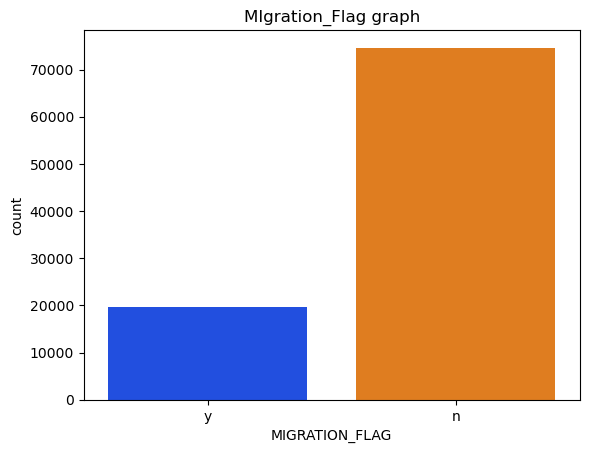

In [37]:
plt.title('MIgration_Flag graph')
sns.countplot(x=data2.MIGRATION_FLAG,palette='bright')

In [38]:
data2.columns

Index(['ID', 'GOVERNORATE', 'CUSTOMER_WITH_ORANGE_MONTHS', 'CUSTOMER_AGE',
       'CUSTOMER_GENDER', 'COMMITMENT', 'COMMITMENT_FG', 'OF_SPEED',
       'OF_PREV_SPEED', 'MIGRATION_FLAG', 'Disconnection_TOTAL_MAX_day',
       'Disconnection_TOTAL_MIN_day', 'Disconnection_TOTAL_SUM_Month',
       'Disconnection_TOTAL_MEAN_Month', 'GB_TOTAL_CONSUMPTION_Month1',
       'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3', 'TARGET'],
      dtype='object')

#### Disconnection_TOTAL_MAX_day

In [39]:
data2.Disconnection_TOTAL_MAX_day.value_counts()

1.0      48309
2.0      25280
3.0      10168
4.0       4818
5.0       2123
         ...  
577.0        1
288.0        1
630.0        1
85.0         1
150.0        1
Name: Disconnection_TOTAL_MAX_day, Length: 178, dtype: int64

In [40]:
data2.Disconnection_TOTAL_MAX_day.describe()

count    93747.000000
mean         2.317311
std          8.210533
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        630.000000
Name: Disconnection_TOTAL_MAX_day, dtype: float64

In [41]:
data2.Disconnection_TOTAL_MAX_day.isna().sum()

622

question about this result :- 

if the min value = 1 and we have some null values we can consider that "People with null values don't face any Disconnection "|

In [42]:
df_test = data2[data2['Disconnection_TOTAL_MAX_day'].isna()]

In [43]:
df_test

,ID,GOVERNORATE,CUSTOMER_WITH_ORANGE_MONTHS,CUSTOMER_AGE,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,MIGRATION_FLAG,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET
72,73,West Amman,30.000000,32.0,M,24,1,100,60.0,y,NaN,NaN,NaN,NaN,0.000000,0.000000,193.387466,0
245,246,West Amman,24.451613,72.0,F,36,1,100,NaN,n,NaN,NaN,NaN,NaN,NaN,0.000588,0.000000,0
321,322,West Amman,22.483871,59.0,M,24,0,200,NaN,n,NaN,NaN,NaN,NaN,0.000000,10.480858,180.599162,0
1082,1083,West Amman,12.129032,21.0,M,24,1,200,NaN,n,NaN,NaN,NaN,NaN,0.000000,108.794018,202.401864,0
1388,1389,West Amman,10.290323,35.0,M,24,1,100,NaN,n,NaN,NaN,NaN,NaN,44.836663,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93906,93907,West Amman,4.419355,20.0,M,12,1,60,NaN,n,NaN,NaN,NaN,NaN,0.000000,165.729008,252.584207,0
94474,94475,East Amman,18.225806,42.0,M,24,1,200,NaN,n,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
94475,94476,West Amman,12.935484,72.0,F,12,1,400,200.0,y,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0
94476,94477,West Amman,9.483871,28.0,M,24,1,200,NaN,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [44]:
df_test.Disconnection_TOTAL_MIN_day.isna().sum()

622

In [45]:
df_test.Disconnection_TOTAL_SUM_Month.isna().sum()

622

In [46]:
df_test.Disconnection_TOTAL_MEAN_Month.isna().sum()

622

After testing, we think that people with NAN values dosn't face any Disconnection ..

we suggest to replace them with 0 when we deal with missing values 

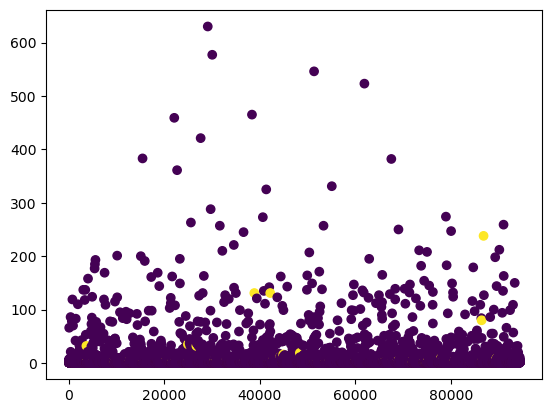

In [47]:
plt.scatter(x=data2.index,y=data2.Disconnection_TOTAL_MAX_day,c=data2.TARGET)

<Axes: >

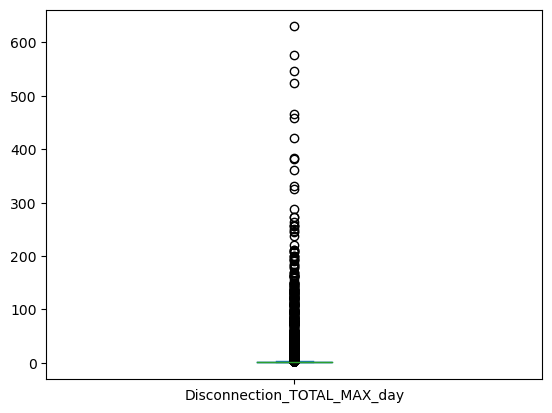

In [48]:
data2.Disconnection_TOTAL_MAX_day.plot.box()

Here we have alot off outlires, we will decide what we'll do with it later. 

#### Disconnection_TOTAL_MIN_day

In [49]:
data2.Disconnection_TOTAL_MIN_day.value_counts()

1.0    93695
2.0       47
5.0        2
3.0        2
4.0        1
Name: Disconnection_TOTAL_MIN_day, dtype: int64

In [50]:
data2.Disconnection_TOTAL_MIN_day.describe()

count    93747.000000
mean         1.000661
std          0.031994
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Disconnection_TOTAL_MIN_day, dtype: float64

In [51]:
data2.Disconnection_TOTAL_MIN_day.isna().sum()

622

we have talked about this results in Disconnection_TOTAL_MAX_day column 

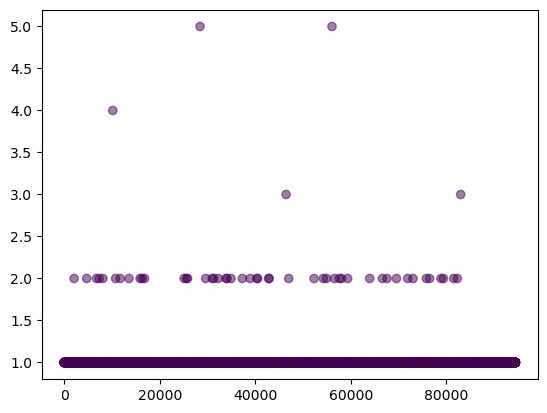

In [52]:
plt.scatter(x=data2.index,y=data2.Disconnection_TOTAL_MIN_day,c=data2.TARGET,alpha=0.5)

<Axes: >

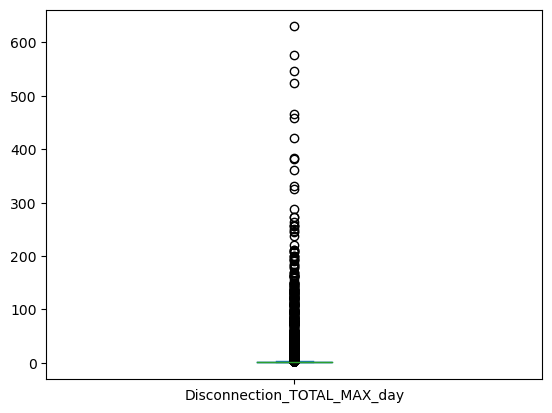

In [53]:
data2.Disconnection_TOTAL_MAX_day.plot.box()

#### Disconnection_TOTAL_SUM_Month column

In [54]:
data2.Disconnection_TOTAL_SUM_Month.value_counts()

5.0      12476
6.0      11401
7.0       8778
8.0       7972
4.0       6578
         ...  
339.0        1
292.0        1
368.0        1
262.0        1
145.0        1
Name: Disconnection_TOTAL_SUM_Month, Length: 267, dtype: int64

In [55]:
data2.Disconnection_TOTAL_SUM_Month.isna().sum()

622

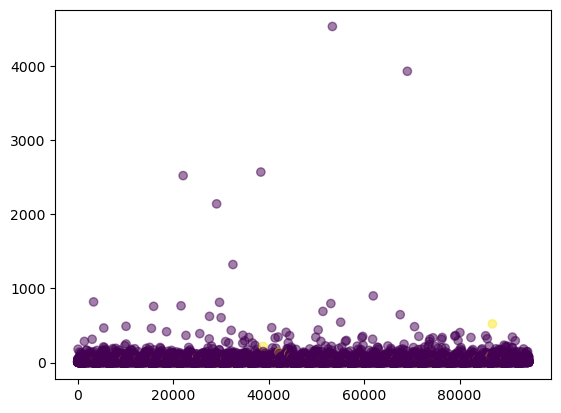

In [56]:
plt.scatter(x=data2.index,y=data2.Disconnection_TOTAL_SUM_Month,c=data2.TARGET,alpha=0.5)

<Axes: >

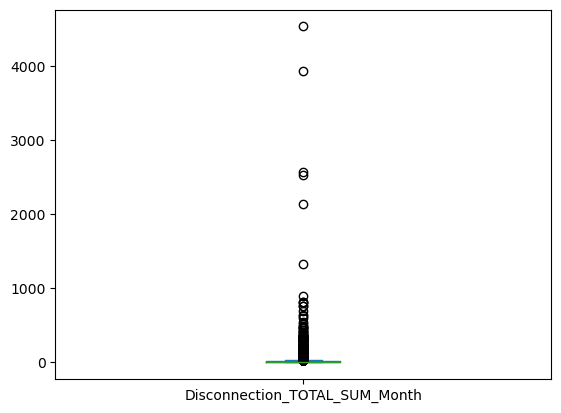

In [57]:
data2.Disconnection_TOTAL_SUM_Month.plot.box()

#### Disconnection_TOTAL_MEAN_Month

In [58]:
data2.Disconnection_TOTAL_MEAN_Month.value_counts()

1.000000    48309
1.166667     4386
1.142857     3557
1.200000     3509
1.333333     2559
            ...  
3.937500        1
4.964912        1
2.585366        1
6.100000        1
2.433333        1
Name: Disconnection_TOTAL_MEAN_Month, Length: 1172, dtype: int64

In [59]:
data2.Disconnection_TOTAL_MEAN_Month.isna().sum()

622

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


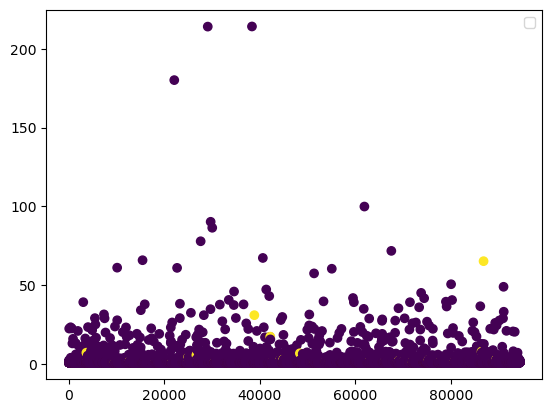

In [60]:
plt.scatter(x=data2.index,y=data2.Disconnection_TOTAL_MEAN_Month,c=data2.TARGET)
plt.legend()

<Axes: >

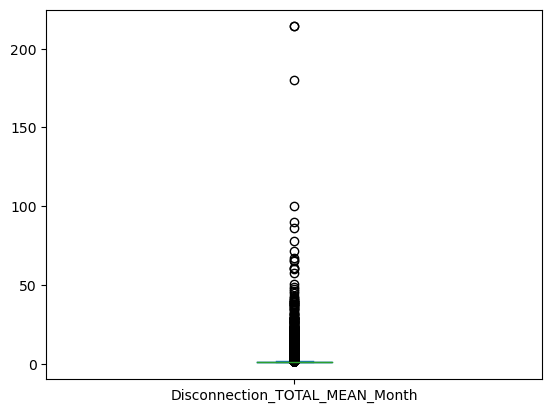

In [61]:
data2.Disconnection_TOTAL_MEAN_Month.plot.box()

#### GB_TOTAL_CONSUMPTION_Month1

In [62]:
data2.GB_TOTAL_CONSUMPTION_Month1.value_counts()

0.000000      430
352.841112      2
498.346384      2
225.532624      2
33.746414       2
             ... 
429.261233      1
434.759044      1
450.339593      1
408.655374      1
510.498996      1
Name: GB_TOTAL_CONSUMPTION_Month1, Length: 93693, dtype: int64

In [63]:
data2.GB_TOTAL_CONSUMPTION_Month1.describe()

count    94215.000000
mean       422.653046
std        315.437531
min          0.000000
25%        207.446443
50%        361.853100
75%        564.827559
max      10350.461041
Name: GB_TOTAL_CONSUMPTION_Month1, dtype: float64

In [64]:
data2.GB_TOTAL_CONSUMPTION_Month1.isna().sum()

154

There'is an intresting value when the consumption= 0, we will see later if that effect the churn decesion or not


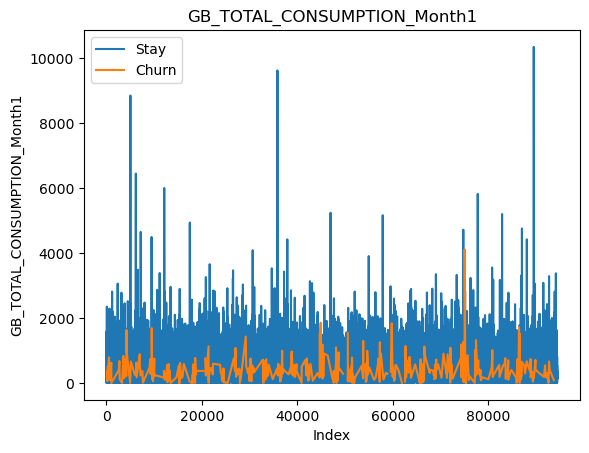

In [65]:
plt.plot(data2[data2.TARGET==0].index, data2[data2.TARGET==0].GB_TOTAL_CONSUMPTION_Month1, label='Stay')
plt.plot(data2[data2.TARGET==1].index, data2[data2.TARGET==1].GB_TOTAL_CONSUMPTION_Month1, label='Churn')
plt.xlabel('Index')
plt.ylabel('GB_TOTAL_CONSUMPTION_Month1')
plt.title('GB_TOTAL_CONSUMPTION_Month1')
plt.legend()
plt.show()

#### GB_TOTAL_CONSUMPTION_Month2

In [66]:
data2.GB_TOTAL_CONSUMPTION_Month2.value_counts()

0.000000      328
60.761288       2
820.306324      2
125.839660      2
815.554065      2
             ... 
802.151357      1
593.483521      1
268.801582      1
356.999597      1
119.621663      1
Name: GB_TOTAL_CONSUMPTION_Month2, Length: 93584, dtype: int64

In [67]:
data2.GB_TOTAL_CONSUMPTION_Month2.isna().sum()

365

In [68]:
data2.GB_TOTAL_CONSUMPTION_Month2.describe()

count    94004.000000
mean       424.856420
std        332.353544
min          0.000000
25%        196.587599
50%        355.276721
75%        570.624895
max      10490.399325
Name: GB_TOTAL_CONSUMPTION_Month2, dtype: float64

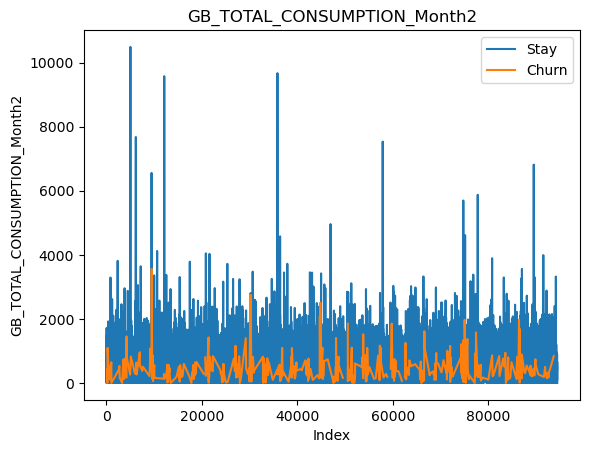

In [69]:
plt.plot(data2[data2.TARGET==0].index, data2[data2.TARGET==0].GB_TOTAL_CONSUMPTION_Month2, label='Stay')
plt.plot(data2[data2.TARGET==1].index, data2[data2.TARGET==1].GB_TOTAL_CONSUMPTION_Month2, label='Churn')
plt.xlabel('Index')
plt.ylabel('GB_TOTAL_CONSUMPTION_Month2')
plt.title('GB_TOTAL_CONSUMPTION_Month2')
plt.legend()
plt.show()

#### GB_TOTAL_CONSUMPTION_Month2

In [70]:
data2.GB_TOTAL_CONSUMPTION_Month3.value_counts()

0.000000      257
278.899165      2
357.700731      2
285.902693      2
457.879634      2
             ... 
220.665747      1
45.539231       1
328.876280      1
754.188174      1
35.928569       1
Name: GB_TOTAL_CONSUMPTION_Month3, Length: 89788, dtype: int64

In [71]:
data2.GB_TOTAL_CONSUMPTION_Month3.describe()

count    90137.000000
mean       396.601194
std        310.562027
min          0.000000
25%        182.654470
50%        333.711954
75%        534.736805
max       9728.721927
Name: GB_TOTAL_CONSUMPTION_Month3, dtype: float64

In [72]:
data2.GB_TOTAL_CONSUMPTION_Month3.isna().sum()

4232

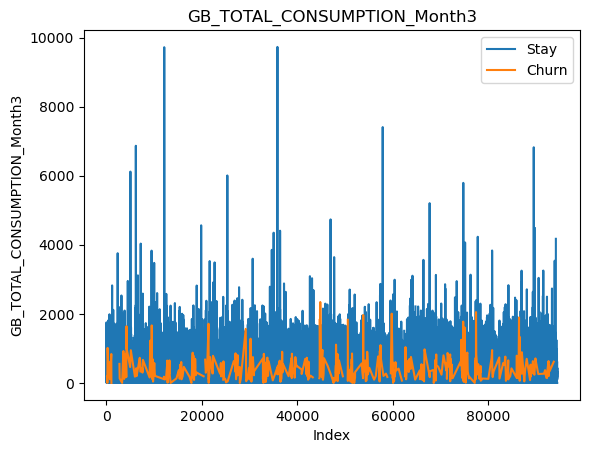

In [73]:
plt.plot(data2[data2.TARGET==0].index, data2[data2.TARGET==0].GB_TOTAL_CONSUMPTION_Month3, label='Stay')
plt.plot(data2[data2.TARGET==1].index, data2[data2.TARGET==1].GB_TOTAL_CONSUMPTION_Month3, label='Churn')
plt.xlabel('Index')
plt.ylabel('GB_TOTAL_CONSUMPTION_Month3')
plt.title('GB_TOTAL_CONSUMPTION_Month3')
plt.legend()
plt.show()

In [74]:
data2.columns

Index(['ID', 'GOVERNORATE', 'CUSTOMER_WITH_ORANGE_MONTHS', 'CUSTOMER_AGE',
       'CUSTOMER_GENDER', 'COMMITMENT', 'COMMITMENT_FG', 'OF_SPEED',
       'OF_PREV_SPEED', 'MIGRATION_FLAG', 'Disconnection_TOTAL_MAX_day',
       'Disconnection_TOTAL_MIN_day', 'Disconnection_TOTAL_SUM_Month',
       'Disconnection_TOTAL_MEAN_Month', 'GB_TOTAL_CONSUMPTION_Month1',
       'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3', 'TARGET'],
      dtype='object')

#### GOVERNORATE

In [75]:
data2.GOVERNORATE.value_counts()

West Amman    43589
East Amman    35486
Irbid          7371
Balqa          3021
Zarqa          2447
Madaba         1113
Jarash          559
Aqaba           458
Karak             9
Ma'an             1
Mafraq            1
Name: GOVERNORATE, dtype: int64

In [76]:
data2.GOVERNORATE.describe()

count          94055
unique            11
top       West Amman
freq           43589
Name: GOVERNORATE, dtype: object

In [77]:
data2.GOVERNORATE.isna().sum()

314

<Axes: xlabel='GOVERNORATE'>

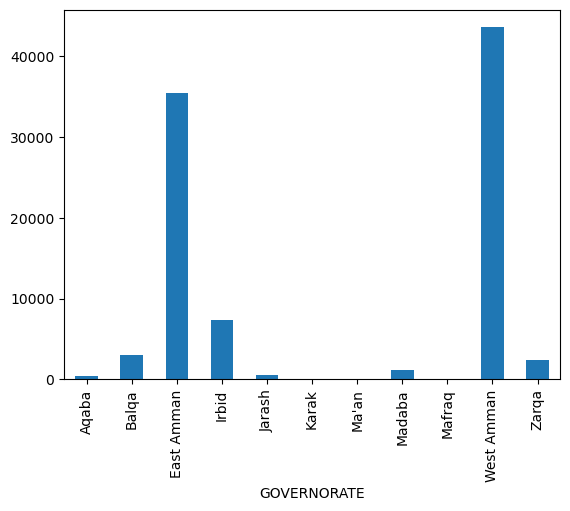

In [78]:
data2.groupby(['GOVERNORATE']).count()['ID'].plot.bar()

#### COMMITMENT_FG


In [79]:
data2.COMMITMENT_FG.value_counts()

1    77033
0    17336
Name: COMMITMENT_FG, dtype: int64

In [80]:
data2[data2.COMMITMENT_FG==0]

,ID,GOVERNORATE,CUSTOMER_WITH_ORANGE_MONTHS,CUSTOMER_AGE,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,MIGRATION_FLAG,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET
1,2,West Amman,44.838710,62.0,M,24,0,100,100.0,y,1.0,1.0,4.0,1.000000,174.360611,159.508825,145.229521,0
3,4,Balqa,43.741935,54.0,M,24,0,200,100.0,y,1.0,1.0,6.0,1.000000,477.543451,791.806873,569.299840,0
5,6,East Amman,40.709677,46.0,M,24,0,100,100.0,y,3.0,1.0,7.0,1.400000,389.975590,341.455887,257.142882,0
6,7,West Amman,40.193548,29.0,M,24,0,100,NaN,n,1.0,1.0,6.0,1.000000,337.857101,395.219425,229.692467,0
7,8,West Amman,40.064516,67.0,M,24,0,200,100.0,y,2.0,1.0,9.0,1.125000,586.301622,675.635146,574.276162,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93802,93803,West Amman,10.161290,81.0,M,12,0,60,NaN,n,2.0,1.0,7.0,1.166667,75.944241,98.962405,108.185306,0
93821,93822,West Amman,10.096774,64.0,F,12,0,60,NaN,n,1.0,1.0,5.0,1.000000,342.736923,350.216223,221.659472,0
93948,93949,Balqa,11.709677,43.0,M,12,0,60,NaN,n,2.0,1.0,11.0,1.222222,396.321765,878.494376,740.602142,0
93950,93951,East Amman,10.870968,20.0,F,12,0,60,NaN,n,2.0,1.0,20.0,1.250000,661.632992,591.050828,644.770502,0


<Axes: xlabel='COMMITMENT_FG'>

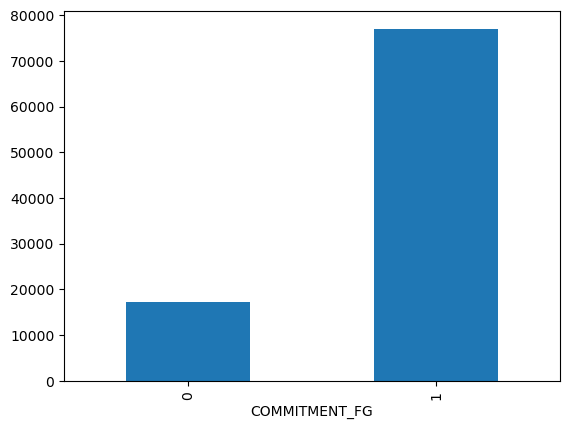

In [81]:
data2.groupby(['COMMITMENT_FG']).count()['ID'].plot.bar()

The end of univariate analyisis 

### TARGET Column

In [82]:
data2.TARGET.value_counts()

0    93846
1      523
Name: TARGET, dtype: int64

In [83]:
data2.TARGET.describe()

count    94369.000000
mean         0.005542
std          0.074239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: TARGET, dtype: float64

<Axes: xlabel='TARGET'>

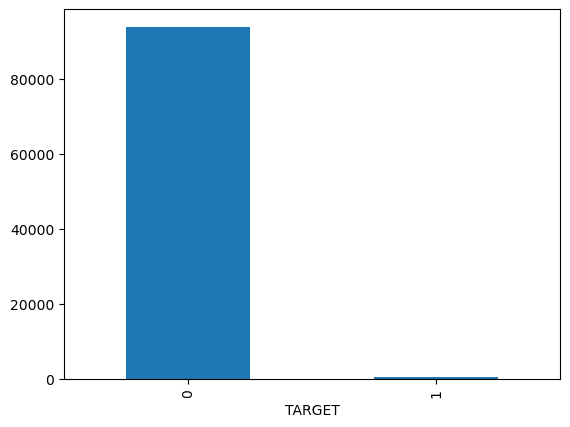

In [84]:
data2.groupby(['TARGET']).count()['ID'].plot.bar()

we can see that we have a big impalanced between the TARGET values which we must handel nessesary 
before start modeling

### Dealing With Missing Values 

In [177]:
data2.isna().sum()

ID                                0
CUSTOMER_WITH_ORANGE_MONTHS       0
CUSTOMER_AGE                      0
CUSTOMER_GENDER                   0
COMMITMENT                        0
COMMITMENT_FG                     0
OF_SPEED                          0
OF_PREV_SPEED                     0
MIGRATION_FLAG                    0
Disconnection_TOTAL_MAX_day       0
Disconnection_TOTAL_MIN_day       0
Disconnection_TOTAL_SUM_Month     0
Disconnection_TOTAL_MEAN_Month    0
GB_TOTAL_CONSUMPTION_Month1       0
GB_TOTAL_CONSUMPTION_Month2       0
GB_TOTAL_CONSUMPTION_Month3       0
TARGET                            0
GB_MEAN_CONSUMPTION_MONTH         0
East_Amman                        0
MIDDLE_JORDAN                     0
NORTH_JORDAN                      0
SOUTH_JORDAN                      0
West_Amman                        0
dtype: int64

In [86]:
data2.duplicated().sum()

0

In [87]:
# let's start with GOVERNORATE
m = data2.GOVERNORATE.mode()[0]

data2.GOVERNORATE.fillna(m,inplace=True)

In [88]:
# Gender column
m = data2.CUSTOMER_GENDER.mode()[0]

data2.CUSTOMER_GENDER.fillna(m,inplace=True)

data2['CUSTOMER_GENDER'] = data2['CUSTOMER_GENDER'].replace('U', 'M')

In [89]:
# OF_PREV_SPEED column

data2.OF_PREV_SPEED.fillna(0,inplace=True)

In [90]:
# Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MEAN_Month,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month columns
data2.Disconnection_TOTAL_MAX_day.fillna(0,inplace=True)
data2.Disconnection_TOTAL_MEAN_Month.fillna(0,inplace=True)
data2.Disconnection_TOTAL_MIN_day.fillna(0,inplace=True)
data2.Disconnection_TOTAL_SUM_Month.fillna(0,inplace=True)

In [91]:
data3 = data2.copy()

In [92]:
def fill_null_values(df):
   
    df = df.dropna(subset=['GB_TOTAL_CONSUMPTION_Month1', 'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3'], how='all')

    # Iterate over each column
    for col in ['GB_TOTAL_CONSUMPTION_Month1', 'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3']:
        
        null_records = df[df[col].isnull()]
        
        for index, row in null_records.iterrows():
            num_values = sum(~row[['GB_TOTAL_CONSUMPTION_Month1', 'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3']].isnull())
            
           
            if num_values == 1:
                mode_value = row[['GB_TOTAL_CONSUMPTION_Month1', 'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3']].mode().iloc[0]
                df.loc[index, col] = mode_value

                mean_value = row[['GB_TOTAL_CONSUMPTION_Month1', 'GB_TOTAL_CONSUMPTION_Month2']].mean()
                df.loc[index, 'GB_TOTAL_CONSUMPTION_Month3'] = mean_value

            
            elif num_values == 2:
                mean_value = row[['GB_TOTAL_CONSUMPTION_Month1', 'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3']].mean()
                df.loc[index, col] = mean_value

    return df

In [93]:
data2 = fill_null_values(data2)

In [94]:
data2.isna().sum()

ID                                0
GOVERNORATE                       0
CUSTOMER_WITH_ORANGE_MONTHS       0
CUSTOMER_AGE                      0
CUSTOMER_GENDER                   0
COMMITMENT                        0
COMMITMENT_FG                     0
OF_SPEED                          0
OF_PREV_SPEED                     0
MIGRATION_FLAG                    0
Disconnection_TOTAL_MAX_day       0
Disconnection_TOTAL_MIN_day       0
Disconnection_TOTAL_SUM_Month     0
Disconnection_TOTAL_MEAN_Month    0
GB_TOTAL_CONSUMPTION_Month1       0
GB_TOTAL_CONSUMPTION_Month2       0
GB_TOTAL_CONSUMPTION_Month3       0
TARGET                            0
dtype: int64

#### Now we don't have any null values 

In [95]:
data3 = data2.copy()

### dealing with outliers section 

In [96]:
# using z-score technique


def detect_oulires_z (data):
    outlires = []
    # z_score equation = (xi - Mean) / standard diviation so we will calculate them 
    threshold = 3
    # this threshold indecate that any values
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data :
        z_score = (i - mean) / std
        
        if np.abs(z_score) > threshold :
            outlires.append(i)
    return outlires

In [97]:
# using IQR technique


def detect_outlires_IQR(data):
    outlires= []
    # calculate Q1 and Q3 
    Q1 , Q3  = np.quantile(data,0.25),np.quantile(data,0.75)
    # IQR equation 
    IQR = Q3 - Q1 
    
    # find the upper and the lower bound in the Series, whcih will detect if the values are oulire or
    # not 
    upper_pound = Q3 + (1.5 * IQR)
    lower_pound = Q1 - (1.5 * IQR)
    
    for i in data :
        if i > upper_pound or i < lower_pound:
            outlires.append(i)
    return outlires

In [98]:
## we will start with Customer_Age column 

age_outlires = detect_outlires_IQR(data2.CUSTOMER_AGE)

print("number of oulires = ", len(age_outlires))
print('min vaule = ',min(age_outlires),'max value = ',max(age_outlires))

number of oulires =  122
min vaule =  92.0 max value =  114.0


This outlires make sense and we can't just drop them

In [99]:
#Customer_with_orange_months column 

outlires = detect_outlires_IQR(data2.CUSTOMER_WITH_ORANGE_MONTHS)

print("number of oulires = ", len(outlires))
print('min vaule = ',min(outlires),'max value = ',max(outlires))

number of oulires =  14
min vaule =  50.6451612903226 max value =  50.8387096774193


This seems like we have a cind of distrbution that this values follow up with 

In [100]:
# Disconnection_TOTAL_MAX_day column 
outlires = detect_outlires_IQR(data2.Disconnection_TOTAL_MAX_day)

print("number of oulires = ", len(outlires))
print('min vaule = ',min(outlires),'max value = ',max(outlires))

number of oulires =  9990
min vaule =  4.0 max value =  630.0


Lets investegate about this column

In [101]:
print(sorted(outlires,reverse=True))

[630.0, 577.0, 546.0, 523.0, 465.0, 459.0, 421.0, 383.0, 382.0, 361.0, 331.0, 325.0, 288.0, 274.0, 273.0, 263.0, 259.0, 257.0, 257.0, 250.0, 247.0, 245.0, 238.0, 221.0, 212.0, 211.0, 210.0, 208.0, 207.0, 201.0, 200.0, 198.0, 195.0, 195.0, 193.0, 191.0, 185.0, 183.0, 182.0, 179.0, 177.0, 171.0, 169.0, 169.0, 165.0, 164.0, 163.0, 163.0, 162.0, 162.0, 161.0, 158.0, 154.0, 150.0, 149.0, 149.0, 149.0, 147.0, 147.0, 145.0, 144.0, 144.0, 143.0, 142.0, 141.0, 139.0, 139.0, 138.0, 137.0, 137.0, 137.0, 136.0, 135.0, 135.0, 133.0, 132.0, 132.0, 132.0, 131.0, 131.0, 131.0, 131.0, 129.0, 127.0, 127.0, 127.0, 127.0, 126.0, 124.0, 124.0, 123.0, 123.0, 122.0, 122.0, 121.0, 121.0, 120.0, 119.0, 119.0, 119.0, 118.0, 116.0, 115.0, 114.0, 114.0, 112.0, 112.0, 112.0, 111.0, 111.0, 110.0, 109.0, 109.0, 109.0, 109.0, 108.0, 107.0, 107.0, 106.0, 105.0, 103.0, 101.0, 100.0, 99.0, 99.0, 99.0, 99.0, 98.0, 98.0, 98.0, 98.0, 97.0, 96.0, 96.0, 95.0, 94.0, 93.0, 93.0, 93.0, 93.0, 92.0, 92.0, 91.0, 90.0, 90.0, 88.0, 

In [102]:
# Disconnection total min day outlires 
outlires = detect_outlires_IQR(data2.Disconnection_TOTAL_MIN_day)
print("number of oulires = ", len(outlires))

print('min vaule = ',min(outlires),'max value = ',max(outlires))

number of oulires =  565
min vaule =  0.0 max value =  5.0


we can say that the most of data is in range 1 so 0,2,3,4,5(max) considered as outlires 

In [103]:
# Disconnection total mean month
outlires = detect_outlires_IQR(data2.Disconnection_TOTAL_MEAN_Month)
print("number of oulires = ", len(outlires))

print('min vaule = ',min(outlires),'max value = ',max(outlires))

number of oulires =  8281
min vaule =  0.0 max value =  214.083333333333


In [104]:
data2[data2.Disconnection_TOTAL_MEAN_Month>150]

,ID,GOVERNORATE,CUSTOMER_WITH_ORANGE_MONTHS,CUSTOMER_AGE,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,MIGRATION_FLAG,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET
22078,22079,East Amman,10.741935,25.0,M,24,1,60,0.0,n,459.0,1.0,2521.0,180.071429,81.003904,54.176460,0.002804,0
29094,29095,Madaba,11.322581,32.0,M,24,1,60,0.0,n,630.0,1.0,2140.0,214.000000,200.603587,247.473691,251.373489,0
38358,38359,East Amman,4.419355,60.0,M,12,1,200,0.0,n,465.0,1.0,2569.0,214.083333,361.878684,202.211393,233.069668,0


i'll try drop these data while the target = 0 and they are too far from the distripution 

In [105]:
data2 = data2.drop(data2[data2['Disconnection_TOTAL_MEAN_Month'] > 150].index)

In [106]:
# Disconnection total sum month
outlires = detect_outlires_IQR(data2.Disconnection_TOTAL_SUM_Month)
print("number of oulires = ", len(outlires))

print('min vaule = ',min(outlires),'max value = ',max(outlires))

number of oulires =  11739
min vaule =  27.0 max value =  4532.0


check where total disconnection sum >2000 in a mounth

In [107]:
data2[data2.Disconnection_TOTAL_SUM_Month>2000]

,ID,GOVERNORATE,CUSTOMER_WITH_ORANGE_MONTHS,CUSTOMER_AGE,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,MIGRATION_FLAG,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET
53350,53351,West Amman,5.580645,24.0,M,12,1,60,0.0,n,257.0,1.0,4532.0,39.754386,244.625291,239.350733,286.249374,0
69052,69053,West Amman,23.000000,35.0,M,24,0,60,0.0,n,250.0,1.0,3928.0,35.387387,29.867153,84.493808,94.730284,0


We will drop it sence it's not important for the model it will just confused us 

In [108]:
data2 = data2.drop(data2[data2['Disconnection_TOTAL_SUM_Month'] > 1000].index)

In [109]:
data2.columns

Index(['ID', 'GOVERNORATE', 'CUSTOMER_WITH_ORANGE_MONTHS', 'CUSTOMER_AGE',
       'CUSTOMER_GENDER', 'COMMITMENT', 'COMMITMENT_FG', 'OF_SPEED',
       'OF_PREV_SPEED', 'MIGRATION_FLAG', 'Disconnection_TOTAL_MAX_day',
       'Disconnection_TOTAL_MIN_day', 'Disconnection_TOTAL_SUM_Month',
       'Disconnection_TOTAL_MEAN_Month', 'GB_TOTAL_CONSUMPTION_Month1',
       'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3', 'TARGET'],
      dtype='object')

In [110]:
# GB_TOTAL_CONSUMPTION_Month1
outlires = detect_outlires_IQR(data2.GB_TOTAL_CONSUMPTION_Month1)
print("number of oulires = ", len(outlires))

print('min vaule = ',min(outlires),'max value = ',max(outlires))


number of oulires =  3068
min vaule =  1100.9573311992 max value =  10350.4610406933



while may somepoeple use that amount of data we will keep it 
Note that 100/500 people from this outlires are left Orange so this is soooooooooo important data

In [111]:
data2[(data2.GB_TOTAL_CONSUMPTION_Month1>600)& (data2.TARGET ==1)]

,ID,GOVERNORATE,CUSTOMER_WITH_ORANGE_MONTHS,CUSTOMER_AGE,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,MIGRATION_FLAG,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET
564,565,East Amman,28.354839,54.0,M,24,0,200,0.0,n,1.0,1.0,6.0,1.000000,785.526593,532.679326,602.412177,1
1040,1041,West Amman,24.354839,52.0,F,24,0,60,0.0,n,1.0,1.0,4.0,1.000000,619.584653,644.312176,836.697953,1
2745,2746,West Amman,6.709677,75.0,M,24,1,100,0.0,n,1.0,1.0,5.0,1.000000,672.003539,527.680265,550.906378,1
3576,3577,West Amman,26.225806,47.0,M,24,0,200,0.0,n,2.0,1.0,34.0,1.030303,833.521867,733.645177,922.891407,1
3650,3651,West Amman,34.225806,49.0,M,24,0,200,0.0,n,1.0,1.0,9.0,1.000000,628.467069,675.137033,595.478379,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87059,87060,East Amman,22.580645,55.0,M,24,0,200,0.0,n,2.0,1.0,37.0,1.057143,648.551719,889.128403,888.320368,1
88080,88081,Zarqa,9.354839,44.0,M,12,1,400,100.0,y,1.0,1.0,31.0,1.000000,665.745225,541.511505,697.779702,1
88896,88897,West Amman,43.741935,54.0,M,12,0,100,100.0,y,1.0,1.0,4.0,1.000000,736.501152,537.288281,529.575148,1
89910,89911,East Amman,23.903226,45.0,M,24,0,60,0.0,n,1.0,1.0,6.0,1.000000,707.350140,737.420659,709.396847,1


In [112]:
# GB_TOTAL_CONSUMPTION_Month2
outlires = detect_outlires_IQR(data2.GB_TOTAL_CONSUMPTION_Month2)
print("number of oulires = ", len(outlires))

print('min vaule = ',min(outlires),'max value = ',max(outlires))

number of oulires =  3180
min vaule =  1131.55688606296 max value =  10490.3993254816


In [113]:
# GB_TOTAL_CONSUMPTION_Month3
outlires = detect_outlires_IQR(data2.GB_TOTAL_CONSUMPTION_Month3)
print("number of oulires = ", len(outlires))

print('min vaule = ',min(outlires),'max value = ',max(outlires))

number of oulires =  3126
min vaule =  1050.27966489736 max value =  9728.72192678228


# Correlcation between features 

<Axes: >

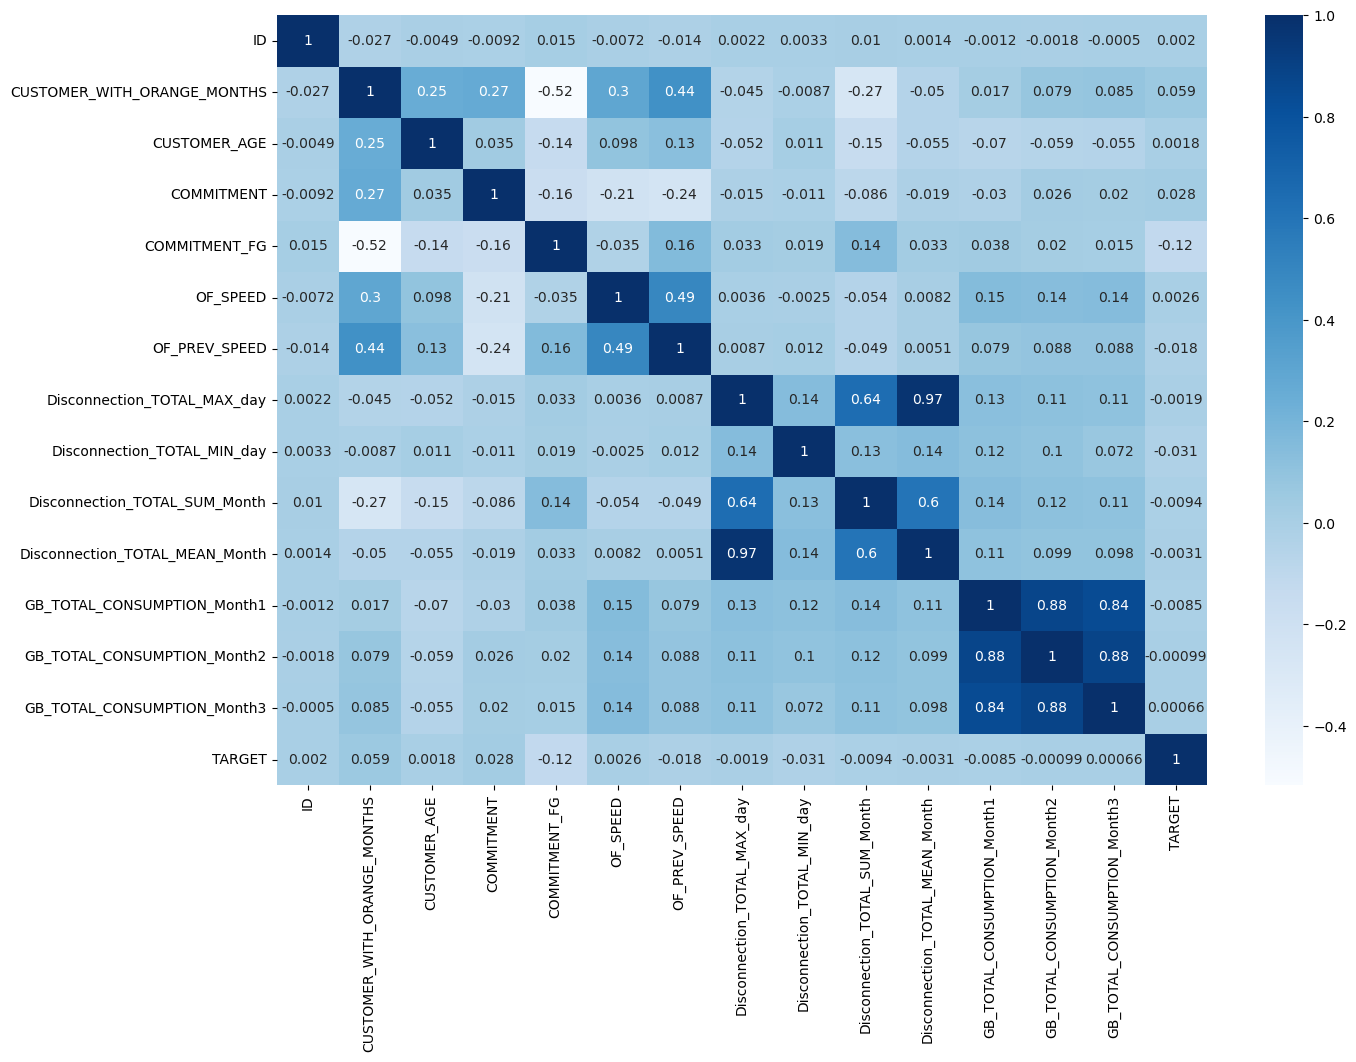

In [114]:
corr = data2.corr(method='spearman')
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='Blues')

In [115]:
corr2= data2.corr(method='kendall')

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<Axes: >

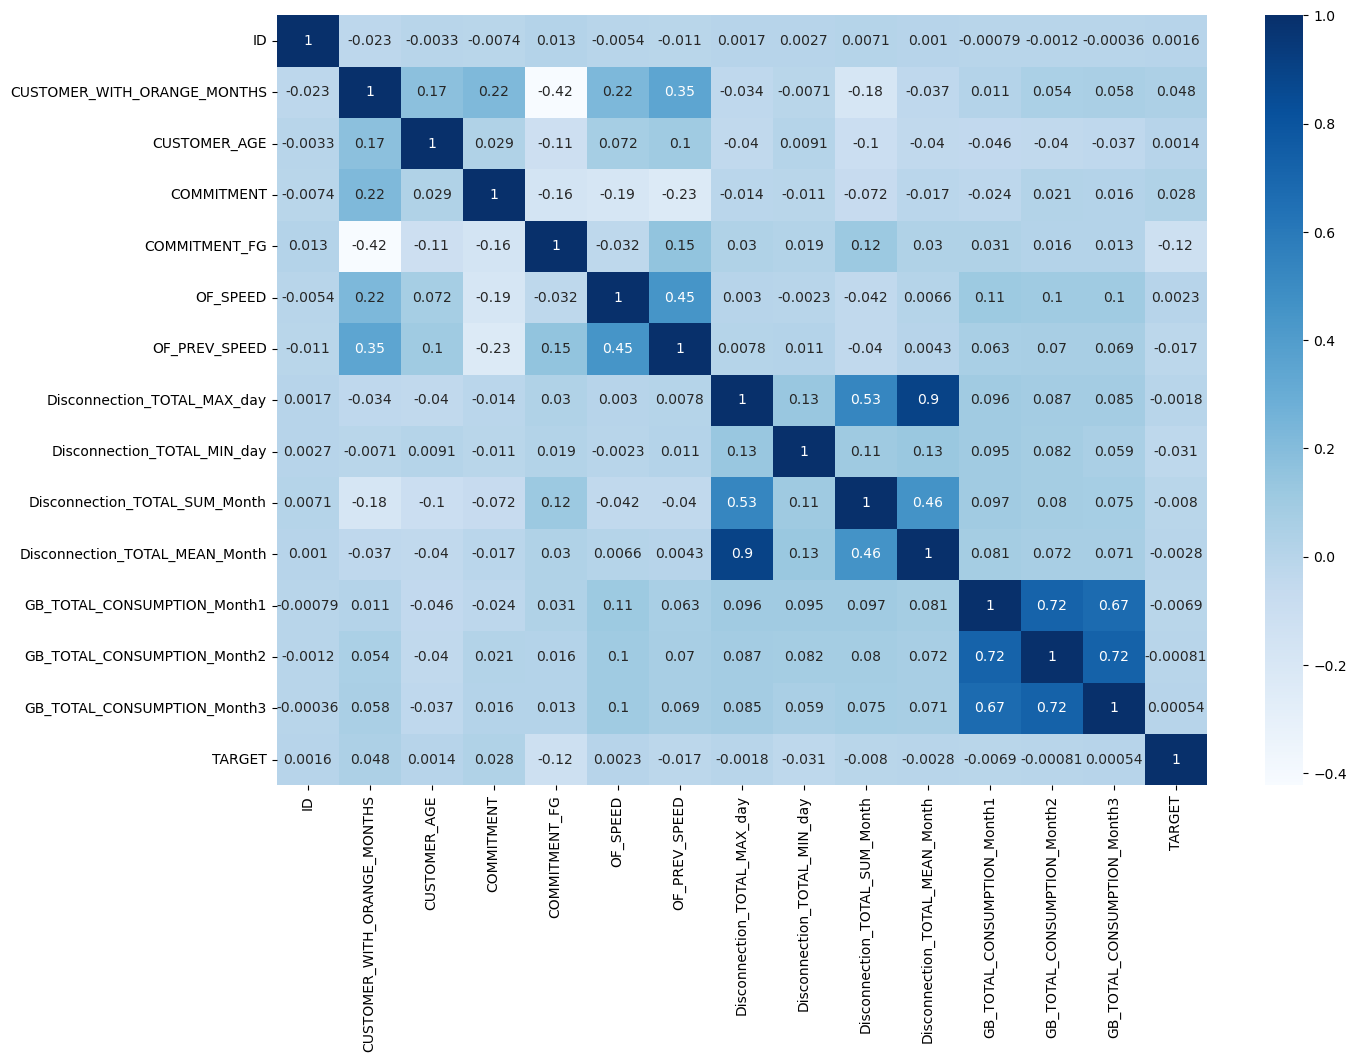

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(corr2,annot=True,cmap='Blues')

In [117]:
corr3= data2.corr()

<Axes: >

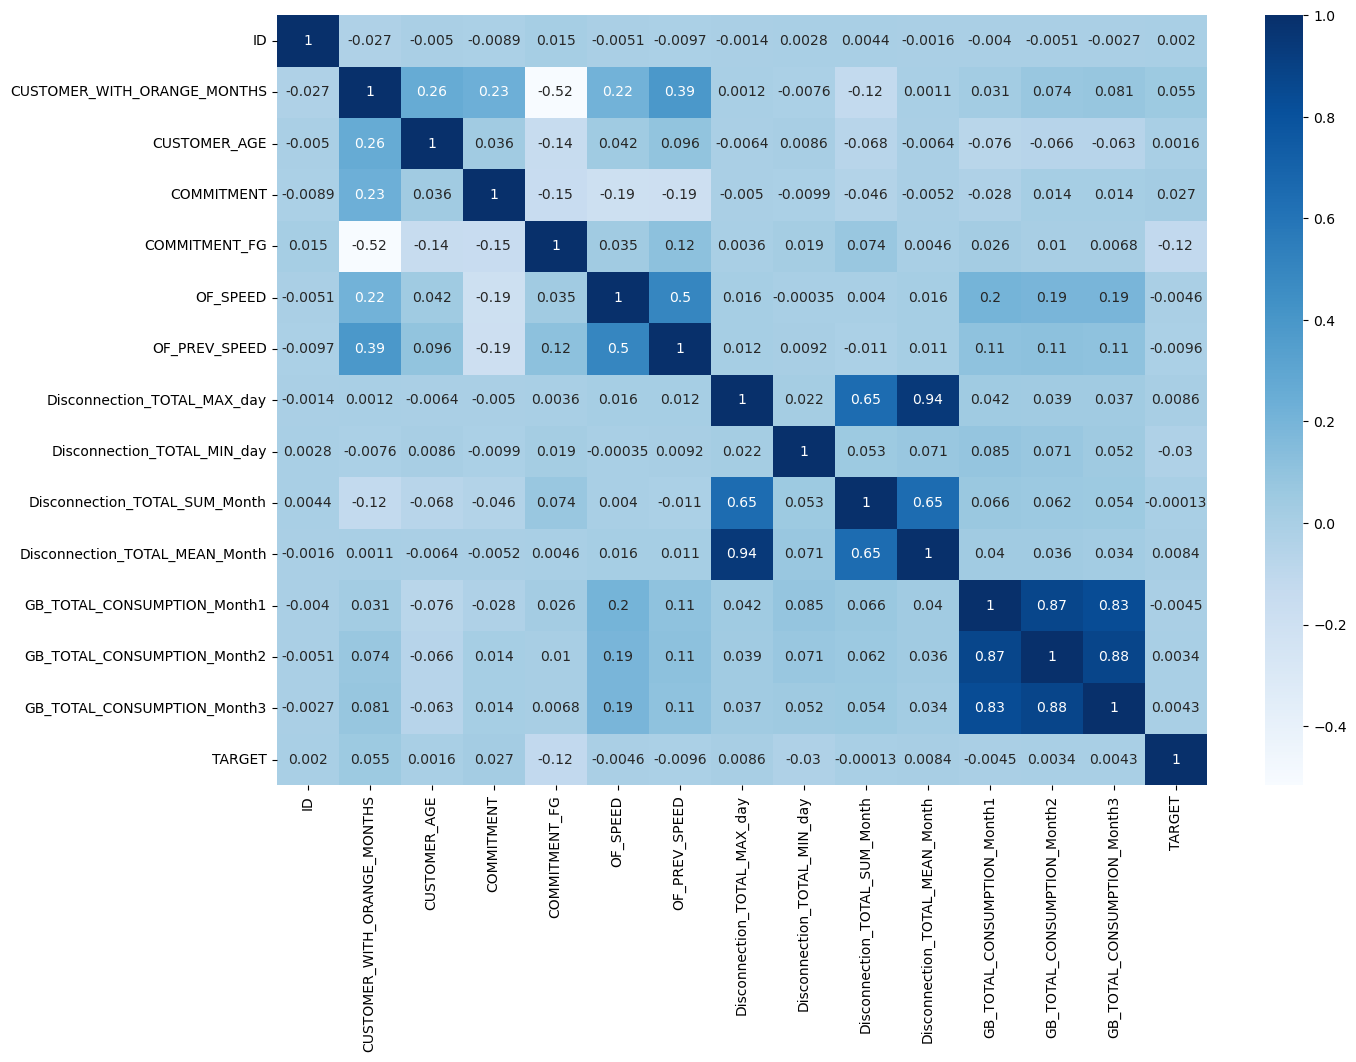

In [118]:
plt.figure(figsize=(15,10))
sns.heatmap(corr3,annot=True,cmap='Blues')

categorical vs categorical 


In [119]:
contingency_table = pd.crosstab(data2.COMMITMENT_FG,data2.GOVERNORATE)
contingency_table

GOVERNORATE,Aqaba,Balqa,East Amman,Irbid,Jarash,Karak,Ma'an,Madaba,Mafraq,West Amman,Zarqa
COMMITMENT_FG,,,,,,,,,,,
0,1,454,4943,562,0,0,0,1,0,11199,142
1,457,2567,30513,6800,559,8,1,1111,1,32630,2305


In [120]:
from scipy import stats
#commitment_fg and governorate
# Calculate the chi-square test statistic
chi2_statistic = stats.chi2_contingency(contingency_table)[0]

# Calculate the minimum of rows and columns in the contingency table
min_dim = min(contingency_table.shape[0], contingency_table.shape[1])

# Calculate Cramér's V
cramer_v = np.sqrt(chi2_statistic / (data2.shape[0] * (min_dim - 1)))

print("Cramér's V:", cramer_v)

Cramér's V: 0.18699044197819975


There is no strong relation betweeen commitment_fg and governorate

In [121]:
contingency_table = pd.crosstab(data2.CUSTOMER_GENDER,data2.MIGRATION_FLAG)
contingency_table

MIGRATION_FLAG,n,y
CUSTOMER_GENDER,,
F,16710,3894
M,57808,15842


In [122]:
# Calculate the chi-square test statistic
chi2_statistic = stats.chi2_contingency(contingency_table)[0]

# Calculate the minimum of rows and columns in the contingency table
min_dim = min(contingency_table.shape[0], contingency_table.shape[1])

# Calculate Cramér's V
cramer_v = np.sqrt(chi2_statistic / (data2.shape[0] * (min_dim - 1)))

print("Cramér's V:", cramer_v)

Cramér's V: 0.02648655848715963


In [123]:
contingency_table = pd.crosstab(data2.TARGET,data2.MIGRATION_FLAG)
contingency_table

MIGRATION_FLAG,n,y
TARGET,,
0,74056,19679
1,462,57


In [124]:
# Calculate the chi-square test statistic
chi2_statistic = stats.chi2_contingency(contingency_table)[0]

# Calculate the minimum of rows and columns in the contingency table
min_dim = min(contingency_table.shape[0], contingency_table.shape[1])

# Calculate Cramér's V
cramer_v = np.sqrt(chi2_statistic / (data2.shape[0] * (min_dim - 1)))

print("Cramér's V:", cramer_v)

Cramér's V: 0.018032529612656414



There isn't storng correlated feauter with target

## Created new featuter from dataset 

In [125]:
#Mean consumption of costumer
data2['GB_MEAN_CONSUMPTION_MONTH'] = (data2.GB_TOTAL_CONSUMPTION_Month1 + data2.GB_TOTAL_CONSUMPTION_Month2+data2.GB_TOTAL_CONSUMPTION_Month3)/3

In [126]:
# we will reduce GOVERNORATE classes to 5 classes to reduce the impalanced in the data and to reduce dimention after encoding

In [127]:
data2.GOVERNORATE.value_counts()

West Amman    43829
East Amman    35456
Irbid          7362
Balqa          3021
Zarqa          2447
Madaba         1112
Jarash          559
Aqaba           458
Karak             8
Ma'an             1
Mafraq            1
Name: GOVERNORATE, dtype: int64

In [128]:

mapping = {
    'West Amman': 'West_Amman',
    'East Amman': 'East_Amman',
    'Irbid': 'NORTH_JORDAN',
    'Balqa': 'MIDDLE_JORDAN',
    'Zarqa': 'MIDDLE_JORDAN',
    'Madaba': 'MIDDLE_JORDAN',
    'Jarash': 'NORTH_JORDAN',
    'Aqaba': 'SOUTH_JORDAN',
    'Karak': 'SOUTH_JORDAN',
    'Ma\'an': 'SOUTH_JORDAN',
    'Mafraq': 'NORTH_JORDAN'
}

data2['GOVERNORATE'] = data2['GOVERNORATE'].map(mapping)

# Print the updated dataset
data2.GOVERNORATE.value_counts()


West_Amman       43829
East_Amman       35456
NORTH_JORDAN      7922
MIDDLE_JORDAN     6580
SOUTH_JORDAN       467
Name: GOVERNORATE, dtype: int64

## Encoding and dealing with categorical features 

In [129]:
data2.columns

Index(['ID', 'GOVERNORATE', 'CUSTOMER_WITH_ORANGE_MONTHS', 'CUSTOMER_AGE',
       'CUSTOMER_GENDER', 'COMMITMENT', 'COMMITMENT_FG', 'OF_SPEED',
       'OF_PREV_SPEED', 'MIGRATION_FLAG', 'Disconnection_TOTAL_MAX_day',
       'Disconnection_TOTAL_MIN_day', 'Disconnection_TOTAL_SUM_Month',
       'Disconnection_TOTAL_MEAN_Month', 'GB_TOTAL_CONSUMPTION_Month1',
       'GB_TOTAL_CONSUMPTION_Month2', 'GB_TOTAL_CONSUMPTION_Month3', 'TARGET',
       'GB_MEAN_CONSUMPTION_MONTH'],
      dtype='object')

In [130]:
data2.CUSTOMER_GENDER = data2.CUSTOMER_GENDER.map({'M':1,'F':0})

In [131]:
data2.CUSTOMER_GENDER.value_counts()

1    73650
0    20604
Name: CUSTOMER_GENDER, dtype: int64

In [132]:
data2.MIGRATION_FLAG = data2.MIGRATION_FLAG.map({'y':1,'n':0})

In [133]:
data2.MIGRATION_FLAG.value_counts()

0    74518
1    19736
Name: MIGRATION_FLAG, dtype: int64

In [134]:
data2.GOVERNORATE.value_counts()

West_Amman       43829
East_Amman       35456
NORTH_JORDAN      7922
MIDDLE_JORDAN     6580
SOUTH_JORDAN       467
Name: GOVERNORATE, dtype: int64

In [135]:
data2.COMMITMENT = data2.COMMITMENT.map({24:2,12:1,36:3})


In [136]:
 Gover=pd.get_dummies(data2.GOVERNORATE)

In [137]:
data2 = pd.concat([data2,Gover],axis=1)
data2.drop(['GOVERNORATE'],axis=1,inplace=True)
data2.head()

,ID,CUSTOMER_WITH_ORANGE_MONTHS,CUSTOMER_AGE,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,MIGRATION_FLAG,Disconnection_TOTAL_MAX_day,...,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET,GB_MEAN_CONSUMPTION_MONTH,East_Amman,MIDDLE_JORDAN,NORTH_JORDAN,SOUTH_JORDAN,West_Amman
0,1,48.741935,47.0,1,2,1,200,100.0,1,1.0,...,645.685532,561.726552,519.477249,0,575.629778,0,0,0,0,1
1,2,44.838710,62.0,1,2,0,100,100.0,1,1.0,...,174.360611,159.508825,145.229521,0,159.699652,0,0,0,0,1
2,3,44.612903,44.0,1,2,1,200,100.0,1,2.0,...,299.379466,319.849905,257.353694,0,292.194355,0,0,0,0,1
3,4,43.741935,54.0,1,2,0,200,100.0,1,1.0,...,477.543451,791.806873,569.299840,0,612.883388,0,1,0,0,0
4,5,41.548387,26.0,1,1,1,400,100.0,1,2.0,...,891.318951,937.062921,791.050654,0,873.144175,0,0,0,0,1


In [138]:
data2.head()

,ID,CUSTOMER_WITH_ORANGE_MONTHS,CUSTOMER_AGE,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,OF_SPEED,OF_PREV_SPEED,MIGRATION_FLAG,Disconnection_TOTAL_MAX_day,...,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,TARGET,GB_MEAN_CONSUMPTION_MONTH,East_Amman,MIDDLE_JORDAN,NORTH_JORDAN,SOUTH_JORDAN,West_Amman
0,1,48.741935,47.0,1,2,1,200,100.0,1,1.0,...,645.685532,561.726552,519.477249,0,575.629778,0,0,0,0,1
1,2,44.838710,62.0,1,2,0,100,100.0,1,1.0,...,174.360611,159.508825,145.229521,0,159.699652,0,0,0,0,1
2,3,44.612903,44.0,1,2,1,200,100.0,1,2.0,...,299.379466,319.849905,257.353694,0,292.194355,0,0,0,0,1
3,4,43.741935,54.0,1,2,0,200,100.0,1,1.0,...,477.543451,791.806873,569.299840,0,612.883388,0,1,0,0,0
4,5,41.548387,26.0,1,1,1,400,100.0,1,2.0,...,891.318951,937.062921,791.050654,0,873.144175,0,0,0,0,1


In [178]:
X = data2.drop(['TARGET','ID'],axis=1)
y = data2[['TARGET']]

In [182]:
X.shape

(94254, 21)

In [184]:
X_cat = X[['CUSTOMER_GENDER','COMMITMENT','COMMITMENT_FG','MIGRATION_FLAG','East_Amman',
              'MIDDLE_JORDAN','NORTH_JORDAN','SOUTH_JORDAN',"West_Amman"]]

In [185]:
X_num = X[['CUSTOMER_WITH_ORANGE_MONTHS','CUSTOMER_AGE','OF_SPEED','OF_PREV_SPEED','Disconnection_TOTAL_MAX_day',
              'Disconnection_TOTAL_MIN_day','Disconnection_TOTAL_SUM_Month','Disconnection_TOTAL_MEAN_Month',
              'GB_TOTAL_CONSUMPTION_Month1','GB_TOTAL_CONSUMPTION_Month2','GB_TOTAL_CONSUMPTION_Month3',
              'GB_MEAN_CONSUMPTION_MONTH']]

In [199]:
from sklearn.preprocessing import MinMaxScaler

stscaler = StandardScaler()

scaled_num = stscaler.fit_transform(X_num)

AttributeError: 'numpy.ndarray' object has no attribute 'sh'

In [201]:
X_cat.reset_index(drop=True, inplace=True)
scaled_num_df = pd.DataFrame(scaled_num, columns=X_num.columns)

X_ready = pd.concat([X_cat, scaled_num_df], axis=1)
X_ready.head()

,CUSTOMER_GENDER,COMMITMENT,COMMITMENT_FG,MIGRATION_FLAG,East_Amman,MIDDLE_JORDAN,NORTH_JORDAN,SOUTH_JORDAN,West_Amman,CUSTOMER_WITH_ORANGE_MONTHS,...,OF_SPEED,OF_PREV_SPEED,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,GB_MEAN_CONSUMPTION_MONTH
0,1,2,1,1,0,0,0,0,1,2.937955,...,1.018374,1.441679,-0.169861,0.059633,0.960291,-0.163823,0.707456,0.414213,0.413497,0.535849
1,1,2,0,1,0,0,0,0,1,2.573605,...,-0.004834,1.441679,-0.169861,0.059633,-0.523681,-0.163823,-0.786590,-0.795955,-0.800754,-0.833459
2,1,2,1,1,0,0,0,0,1,2.552527,...,1.018374,1.441679,-0.037340,0.059633,-0.311685,0.081856,-0.390295,-0.313530,-0.436965,-0.397265
3,1,2,0,1,0,1,0,0,0,2.471225,...,1.018374,1.441679,-0.169861,0.059633,-0.417683,-0.163823,0.174465,1.106465,0.575147,0.658493
4,1,1,1,1,0,0,0,0,1,2.266466,...,3.064789,1.441679,-0.037340,0.059633,0.112307,-0.058532,1.486086,1.543502,1.294620,1.515313


In [190]:
X_ready.shape

(94254, 21)

In [183]:
y.shape

(94254, 1)

In [158]:
scaled_num_df.head()

,CUSTOMER_WITH_ORANGE_MONTHS,CUSTOMER_AGE,OF_SPEED,OF_PREV_SPEED,Disconnection_TOTAL_MAX_day,Disconnection_TOTAL_MIN_day,Disconnection_TOTAL_SUM_Month,Disconnection_TOTAL_MEAN_Month,GB_TOTAL_CONSUMPTION_Month1,GB_TOTAL_CONSUMPTION_Month2,GB_TOTAL_CONSUMPTION_Month3,GB_MEAN_CONSUMPTION_MONTH
0,2.937955,0.044388,1.018374,1.441679,-0.169861,0.059633,0.960291,-0.163823,0.707456,0.414213,0.413497,0.535849
1,2.573605,1.025477,-0.004834,1.441679,-0.169861,0.059633,-0.523681,-0.163823,-0.786590,-0.795955,-0.800754,-0.833459
2,2.552527,-0.151830,1.018374,1.441679,-0.037340,0.059633,-0.311685,0.081856,-0.390295,-0.313530,-0.436965,-0.397265
3,2.471225,0.502229,1.018374,1.441679,-0.169861,0.059633,-0.417683,-0.163823,0.174465,1.106465,0.575147,0.658493
4,2.266466,-1.329136,3.064789,1.441679,-0.037340,0.059633,0.112307,-0.058532,1.486086,1.543502,1.294620,1.515313


In [162]:
X_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94254 entries, 0 to 94253
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CUSTOMER_GENDER                 94254 non-null  int64  
 1   COMMITMENT                      94254 non-null  int64  
 2   COMMITMENT_FG                   94254 non-null  int64  
 3   MIGRATION_FLAG                  94254 non-null  int64  
 4   East_Amman                      94254 non-null  uint8  
 5   MIDDLE_JORDAN                   94254 non-null  uint8  
 6   NORTH_JORDAN                    94254 non-null  uint8  
 7   SOUTH_JORDAN                    94254 non-null  uint8  
 8   West_Amman                      94254 non-null  uint8  
 9   CUSTOMER_WITH_ORANGE_MONTHS     94254 non-null  float64
 10  CUSTOMER_AGE                    94254 non-null  float64
 11  OF_SPEED                        94254 non-null  float64
 12  OF_PREV_SPEED                   

#### Now we have a good data we will give it to xgboost to extract the best features 

In [145]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [146]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ready, y, test_size=0.2, random_state=42)

In [147]:
y_train.value_counts()

TARGET
0         74994
1           409
dtype: int64

In [148]:
class_counts = y_train.value_counts()
class_weights = class_counts[0] / class_counts[1]

In [149]:
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=class_weights)

In [150]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [151]:
importance_scores = xgb_classifier.feature_importances_

In [152]:
sorted_indices = importance_scores.argsort()[::-1]

In [153]:
for i in sorted_indices:
    print(f"Feature: {X.columns[i]}, Importance: {importance_scores[i]}")

Feature: CUSTOMER_GENDER, Importance: 0.2543749511241913
Feature: CUSTOMER_AGE, Importance: 0.13636505603790283
Feature: MIGRATION_FLAG, Importance: 0.09963350743055344
Feature: SOUTH_JORDAN, Importance: 0.038737814873456955
Feature: Disconnection_TOTAL_MIN_day, Importance: 0.03710995241999626
Feature: MIDDLE_JORDAN, Importance: 0.036729805171489716
Feature: East_Amman, Importance: 0.03403941169381142
Feature: GB_TOTAL_CONSUMPTION_Month1, Importance: 0.033173568546772
Feature: CUSTOMER_WITH_ORANGE_MONTHS, Importance: 0.032205142080783844
Feature: GB_MEAN_CONSUMPTION_MONTH, Importance: 0.03176562860608101
Feature: West_Amman, Importance: 0.03172784298658371
Feature: Disconnection_TOTAL_SUM_Month, Importance: 0.031154397875070572
Feature: NORTH_JORDAN, Importance: 0.030745187774300575
Feature: Disconnection_TOTAL_MEAN_Month, Importance: 0.030015287920832634
Feature: OF_PREV_SPEED, Importance: 0.029956558719277382
Feature: COMMITMENT, Importance: 0.028147488832473755
Feature: Disconnectio

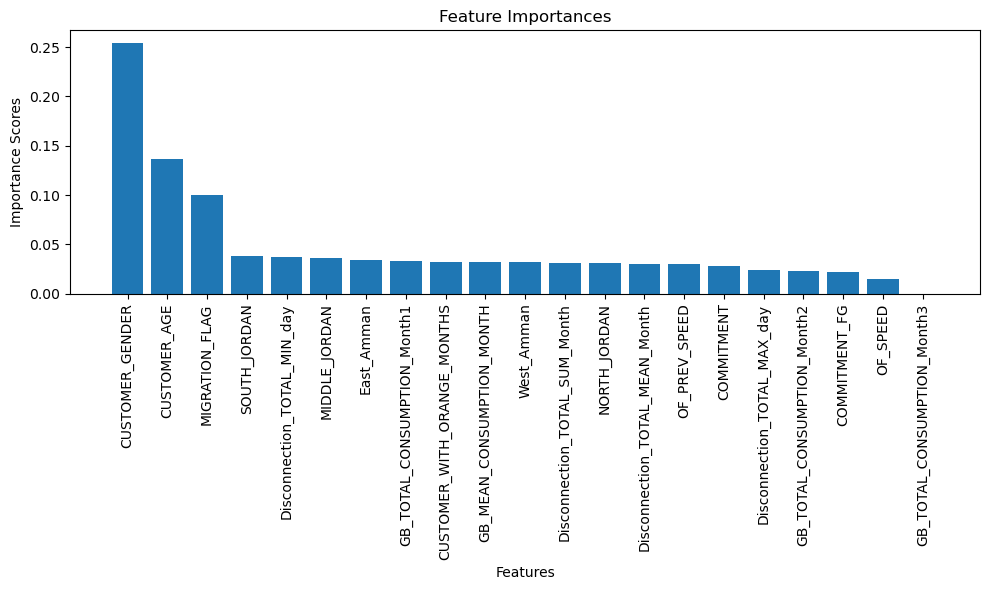

In [154]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance_scores[sorted_indices])
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

### Using random forest to gain best features 

In [155]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier()

rf_clf.fit(X_ready,y)

feature_importances = rf_clf.feature_importances_

sort_ind = feature_importances.argsort()[::-1]

#select top 10 features 
k = 10 

top_features = X_ready.columns[sort_ind][:k]


print("Top {} features:".format(k))
for feature in top_features:
    print(feature)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17588\1132973156.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_ready,y)


Top 10 features:
GB_TOTAL_CONSUMPTION_Month1
GB_TOTAL_CONSUMPTION_Month2
GB_MEAN_CONSUMPTION_MONTH
GB_TOTAL_CONSUMPTION_Month3
CUSTOMER_WITH_ORANGE_MONTHS
CUSTOMER_AGE
Disconnection_TOTAL_SUM_Month
Disconnection_TOTAL_MEAN_Month
Disconnection_TOTAL_MAX_day
OF_SPEED


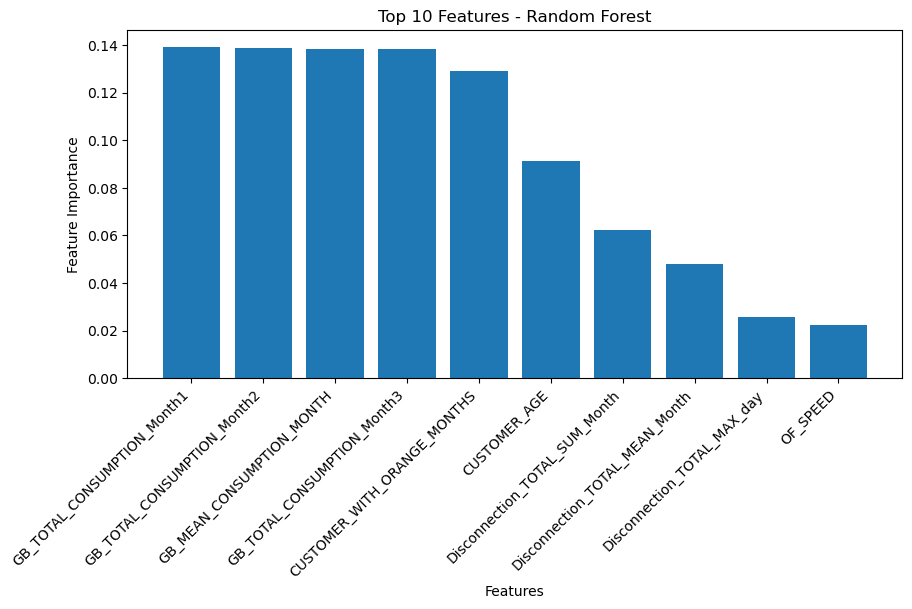

In [156]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Create a bar plot
ax.bar(range(len(top_features)), feature_importances[sort_ind][:k], tick_label=top_features)

# Set labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance')
ax.set_title('Top {} Features - Random Forest'.format(k))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust spacing between the bars
plt.subplots_adjust(bottom=0.3)

# Display the plot
plt.show()


In [157]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)


rfe = RFE(estimator=clf, n_features_to_select=5)


rfe.fit(X_ready, y)

selected_features = [f for f, s in zip(range(X_ready.shape[1]), rfe.support_) if s]
print("Selected Features:")
for feature in selected_features:
    print(f"Feature {feature+1}")


X_selected = rfe.transform(X)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


KeyboardInterrupt: 

In [ ]:
feature_ranking = rfe.ranking_
plt.figure(figsize=(10, 6))
plt.bar(range(X_ready.shape[1]), feature_ranking)
plt.xlabel('Feature Index')
plt.ylabel('Ranking')
plt.title('Feature Rankings')
plt.xticks(np.arange(X_ready.shape[1]),X.columns[sorted_indices],rotation=90)
plt.show()

In [ ]:
chi2_stat,p_val,dof,ex = stats.chi2_contingency(contingency_table)
print("CHI-SQUARE TEST VALUES")
print('=======================')
print("Chi Square Value : ",chi2_stat)
print("Degree of Freedom : ",dof)
print("P Value : ", p_val) 
print()

pbrint("Contigency Table")
print('=======================')
ex

In [ ]:
X

In [207]:
X_ready.drop(['GB_TOTAL_CONSUMPTION_Month1','GB_TOTAL_CONSUMPTION_Month2','GB_TOTAL_CONSUMPTION_Month3'],axis=1,inplace=True)

In [164]:
y

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
94472,0
94473,0
94474,0
94475,0


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)

# Perform random undersampling on the dataset
x_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
y.shap

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Resampling using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Resampling using ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Resampling using random undersampling
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Resampling using random oversampling
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

In [ ]:
ADASYN_oversapmling = pd.concat([X_adasyn, y_adasyn], axis=1)
print(ADASYN_oversapmling.shape)

smote_oversapmling = pd.concat([X_smote, y_smote], axis=1)
print(smote_oversapmling.shape)

random_under = pd.concat([X_undersampled, y_undersampled], axis=1)
print(random_under.shape)

random_over = pd.concat([X_oversampled, y_oversampled], axis=1)
print(random_over.shape)

In [ ]:
ADASYN_oversapmling.to_csv('ADASYN_oversapmling.csv', index=False)

smote_oversapmling.to_csv('smote_oversapmling.csv', index=False)

random_under.to_csv('random_under.csv', index=False)

random_over.to_csv('random_over.csv', index=False)

In [202]:
X_ready.shape

(94254, 21)

In [168]:
y.shape

(94254, 1)

In [208]:
X_ready = X_ready.reset_index(drop=True)
y = y.reset_index(drop=True)

original_data = pd.concat([X_ready, y], axis=1)



In [209]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94254 entries, 0 to 94253
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CUSTOMER_GENDER                 94254 non-null  int64  
 1   COMMITMENT                      94254 non-null  int64  
 2   COMMITMENT_FG                   94254 non-null  int64  
 3   MIGRATION_FLAG                  94254 non-null  int64  
 4   East_Amman                      94254 non-null  uint8  
 5   MIDDLE_JORDAN                   94254 non-null  uint8  
 6   NORTH_JORDAN                    94254 non-null  uint8  
 7   SOUTH_JORDAN                    94254 non-null  uint8  
 8   West_Amman                      94254 non-null  uint8  
 9   CUSTOMER_WITH_ORANGE_MONTHS     94254 non-null  float64
 10  CUSTOMER_AGE                    94254 non-null  float64
 11  OF_SPEED                        94254 non-null  float64
 12  OF_PREV_SPEED                   

In [210]:
original_data.to_csv('original_data.csv',index=False)

In [ ]:
dddd = pd.read_csv('original_data')

In [ ]:
d